# Datenexploration

Nachdem wir Daten geladen haben, wollen wir sie explorieren. Dabei geht es darum
- die Datenstruktur zu verstehen - was steht in welcher Tabelle/Spalte, wie sind die Werte kodiert, welche Skalen werden verwendet?
- die Daten zu verstehen - wie sind die Werte verteilt, was minimal/maximale-Werte, welche Ausprägungen unseres Beobachtungsobjektes gibt es in den Daten?
- die geschäftliche Domäne zu verstehen - welche Aussagen über das Problem lassen sich ableiten, belegen oder widersprechen diese dem Erfahrungswissen der Domänenexperten?

Diese Fragestellungen werden iterativ beantwortet. Z.B. wenn Erkenntnisse aus den Daten im Widerspruch zu Expertenwissen stehen, dann lernt man ggfs. etwas über die Domäne, über die Daten oder die Datenstruktur.

Das Vorgehen ist dabei nicht vorgegeben, sondern man arbeitet sich vor basierend auf dem aktuellen Wissenstand (exploratives Vorgehen). Die Hauptmethoden dabei sind:
- Statistiken berechnen
- Visualisierungen
- Gruppierungen

<div class="alert alert-info"><b>INFO</b>
    <p>Die Übungen und Beispiele basieren auf Daten über 
    weltweite Systeme des öffentlichen Nahverkehrs von <a href="https://www.citylines.co">https://www.citylines.co</a></p>
</div>

## Erste Visualisierungen

Wir starten damit einige Daten über die Städte mit öffentlichem Nahverkehr zu plotten, die wir aus dem letzten Kapitel kennen.

Ales erstes importieren wir wie gewohnt unsere Bibliotheken. Neu hinzu kommen [Matplotlib](https://matplotlib.org) und [seaborn](https://seaborn.pydata.org) - zwei Bibliotheken für die Visualisierung von Daten. Zu Matplotlib gibt es hilfreiche [Cheatsheets](https://github.com/matplotlib/cheatsheets#cheatsheets).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Im nächsten Schritt lesen wir die gefilterte und transformierte cities Datenbank aus dem letzten Kapitel ein. Standardmäßig wird dabei ein neuer Index gebildet, der von 0 an jede Zeile durchnummeriert. Die erste Spalte in unserem Datensatz mit dem Namen 'id' beinhaltet jedoch schon unseren gewünschten Index. Dies können wir mit dem Parameter `index_col` direkt beim Einlesen angeben:

In [3]:
cities = pd.read_csv('data/cities_non_zero.csv', index_col='id')
cities.head()

,name,country,lat,long,start_year,age,length_km
id,,,,,,,
11,Athens,Greece,37.966667,23.716667,1867,157,86.834
139,Boston,United States,42.350000,-71.083333,1806,218,615.505
206,New York,United States,40.783333,-73.966667,1817,207,1089.854
54,Helsinki,Finland,60.166667,25.000000,2017,7,0.639
231,San Francisco,United States,37.783333,-122.433333,1863,161,351.531


Um Grafiken mit Matplotlib zu erstellen, erzeugen wir zunächst mit `plt.subplots` ein `figure` und ein `axes` Objekt. Insbesondere auf dem `axes` Objekt rufen wir dann verschiedene Methoden auf, um z.B. den Titel zu setzen, Daten hinzuzufügen, die Achsen zu beschriften und so weiter. Am Ende einer Zelle rufen wir `plt.show()` auf und erhalten, dann direkt im Jupyter Notebook, das gewünschte Chart.

Es gibt noch weitere Möglichkeiten, wie z.B. direkte Methodenaufrufe auf dem `plt`-Objekt oder verwenden `plot`-Funktion eines pandas DataFrames. Wir konzentrieren uns hier auf den erstgenannten Weg, da er am flexibelsten ist und auch meist in Beispielen insbesondere der [Matplotlib Gallerie](https://matplotlib.org/stable/gallery/index.html) verwendet wird. Die Galerie ist ein guter weg, um sich inspieren zu lassen welche Charts es gibt und welche für die vorhandenen Daten geeignet sind. Zu jedem Beispiel in der Galerie gibt es den Source Code, den man dann ins eigene Notebook kopieren und an den lokalen Datensatz anpassen kann.

Fangen wir mit einem wenig aussagekräftigen aber dafür einfachen Chart an. Wir wollen das Alter des Liniennetzes in Abhängigkeit vom Startjahr plotten:

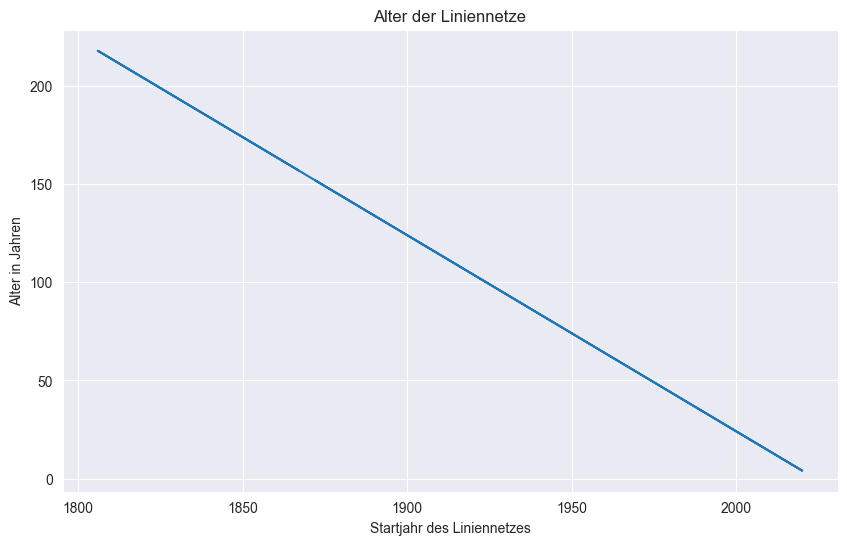

In [4]:
# Erstellen von Figure und Axes Objekt
# Ohne weitere Parameter wird ein einzelner Plot angelegt
# figsize gibt die Breite und Höhe des Plots an
fig, ax = plt.subplots(figsize=(10,6))

# Setzen einer Gesamtüberschrift
ax.set_title("Alter der Liniennetze")
# Setzen von Labeln für die X- und Y-Achse
ax.set_xlabel("Startjahr des Liniennetzes")
ax.set_ylabel("Alter in Jahren")

# Hinzufügen der Daten als Linien-Diagramme
# Erster Parameter sind die Werte auf der X-Achse
# Zweiter Parameter die zugehörigen Werte auf der Y-Achse
ax.plot(cities['start_year'], cities['age'])

plt.show()

Kommen wir zu interessanteren Schaubildern. Als erstes möchten wir die Orte der Städte visualisieren. Dazu verwenden wir den Scatter-Plot. Im Scatter-Plot werden für jede Zeile ein Punkt an X und Y gemacht aber diese nicht mit einer Linie verbunden. Dies eigenet sich um Verteilungen zu vergleichen oder unabhängige Punkte zu visualisieren - wie in unserem Beispiel: die Städte sind unabhängig zu visualisieren und nicht etwa Teil einer geordneten Route durch alle Städte.

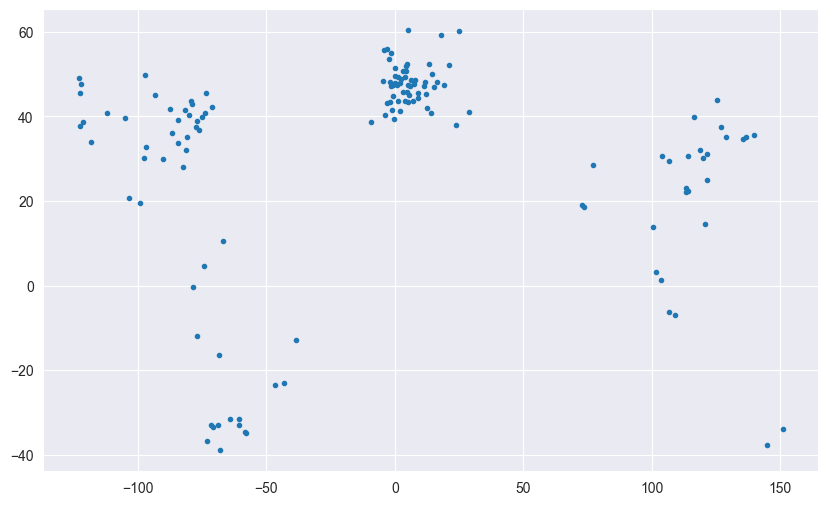

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=cities['long'], y=cities['lat'], marker='.')
plt.show()

Mit etwas Phantasie können wir erraten, wo auf der Weltkarte diese Punkte sind. Besser funktioniert das mit einem Hintergrundbild:

In [ ]:
# Einlesen des Hintergrundbilds aus Bilddatei
# Quelle: https://visibleearth.nasa.gov/images/147190/explorer-base-map
worldmap = plt.imread('eo_base_2020_clean_720x360.jpg')
# Seitenverhältnis des Bilds berechnen: Breite des Bilds / Höhe des Bilds
# aspect_ratio = worldmap.shape[1] / worldmap.shape[0]
# Das Bild ist eine "platte" Projektion der Erde, so das wir Geographische
# Koordinaten direkt als x,y Position auf dem Bild verwenden können
# Bounding Box: links, rechts, unten, oben
# Das Bild geht von -180 bis +180 Längengrad und von -90 bis +90 Breitengrad
bbox = (-180, 180, -90, 90)

# Erstellen eines Plots mit gegebener Größe
fig, ax = plt.subplots(figsize=(18, 9))

# Koordinatensystem über Bild legen
ax.set_xlim(bbox[0], bbox[1])
ax.set_ylim(bbox[2], bbox[3])

# Anzeigen des Bilds
ax.imshow( worldmap, zorder=0, extent=bbox)

# Städte per Scatter-Plot von Längend und Breitengrad auf Bild plotten
ax.scatter(cities['long'], cities['lat'], marker='.' )

plt.show()

Nun können wir auf einen Blick sehen, dass die Daten sehr konzentriert auf Europa sind mit weiteren Datenpunkten aus USA, Asien und Südamerika. Große Teil der Erde besitzen entweder keine Liniennetze oder sind nicht in unserem Datensatz repräsentiert. Wie mit dieser Erkenntnis umgegangen wird ist eine Geschäftsentscheidung. Rein aus den Daten weiß man nicht, ob die Daten repräsentativ sind oder nicht. Dazu braucht man Hintergrundwissen über Liniennetze weltweit. Falls die Daten nicht repräsentativ sind, dann ist es ebenso nur mit domänenspezifischem Hintergrundwissen zu entscheiden, ob das relevant ist und weitere Daten besorgt werden müssen oder ob es für das gegebene Problem egal ist. In jedem Fall muss es dokumentiert und zwischen Analytikern und Auftraggebern geklärt werden.

Kommen wir zurück zum Alter der Lininennetze. Um ein Verständnis zu bekommen wie alt die Netze sind eignet sich ein Histogramm:

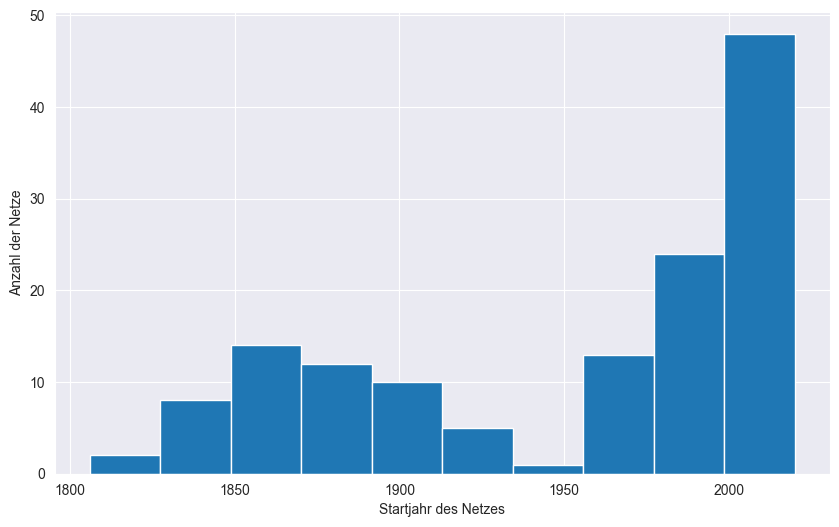

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('Startjahr des Netzes')
ax.set_ylabel('Anzahl der Netze')
ax.hist(cities['start_year'])
plt.show()

Das Histogramm benötigt nur eine Spalte. Die Werte dieser Spalte werden in Klassen (*bins*) eingeteilt, die mehrere Werte (z.B. die Jahre 1850 - 1870) zusammenfassen. Diese Klassen werden auf der x-Achse des Histograms dargestellt und auf der Y-Achse wird die Anzahl der Zeilen mit einem Wert innerhalb der entsprechenden Klasse aufgetragen. Die Klassen können variiert werden, entweder durch explizite Angabe oder durch die Anzahl. Im Folgenden ein Beispiel mit einem bin von abweichender Größe für den 2. Weltkrieg:

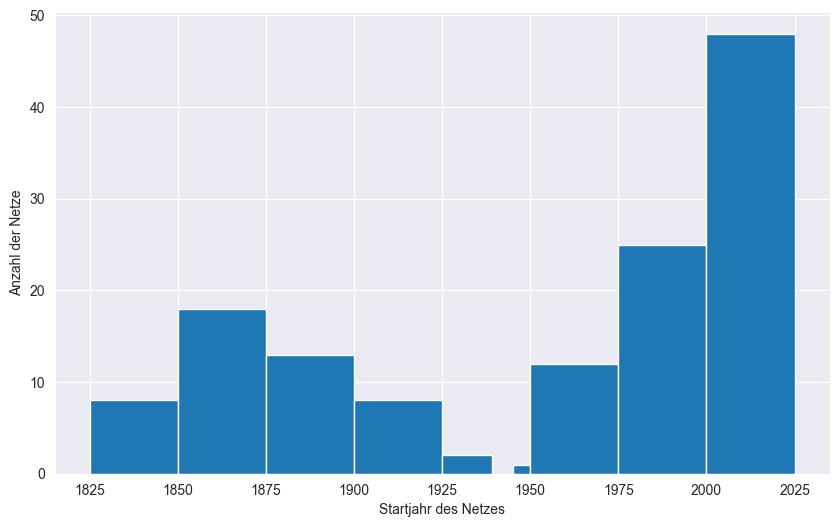

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('Startjahr des Netzes')
ax.set_ylabel('Anzahl der Netze')
ax.hist(cities['start_year'], bins=[1825, 1850, 1875, 1900, 1925, 1939,1945,1950, 1975, 2000, 2025])
plt.show()

Die Anzahl und Auswahl der *bins* kann großen Einfluss auf die Darstellung haben und was daraus interpretiert. Das kann man umgehen indem man die Anzahl der *bins* auf die Anzahl der Datenpunkte setzt. Hier bietet sich aber eine kumulative Darstellung an, die nicht die Anzahl der Einträge im entsprechenden *bin* darstellt (diese ist ja per Definition immer 1 - abgesehen von Datendopplungen), sondern die Summe aller Datenpunkte, die kleiner oder gleich dem entsprechenden Wert auf der X-Achse ist. Dies wird auch Summenhäufigkeitsfunktion der Stichprobe oder auf englisch empirical cumulative distribution dunction (ECDF) genannt. 

Um die ECDF besser zu verstehen, hilft es die Daten mit 2 einfachen NumPy-Funktionen berechnen:
- `np.sort()` sortiert unsere Werte aufsteigend - dies wird die X-Achse. Achtung: nicht die Series direkt sortieren, sondern eine Kopie der Daten, sonst wird die Spalte isoliert sortiert und passt nicht mehr zu den anderen Spalten
- `np.arrange(n)` erstellt ein Array von 0 bis n-1 - dies wird die Y-Achse. Es funktioniert in diesem Fall wie ein hochlaufender Zähler der Zeilen und somit der Datensätze, die kleiner gleich dem Wert auf der X-Achse an entsprechender Position ist

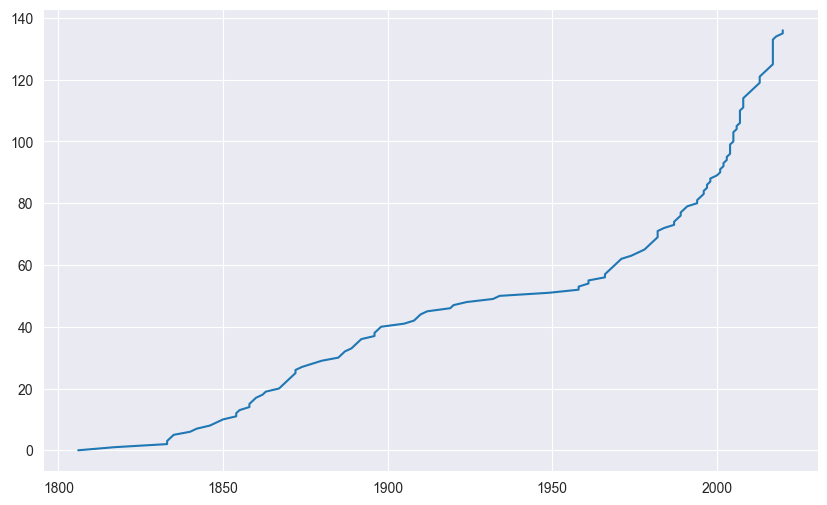

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
# Achtung erst mit .values auf eine Kopie der Daten zugreifen
x = np.sort(cities['start_year'].values)
y = np.arange(len(cities['start_year']))
ax.plot(x, y)
plt.show()

Alternativ gibt es (wie bei vielen statistischen Charts) ein vorgefertigtes Chart in seaborn:

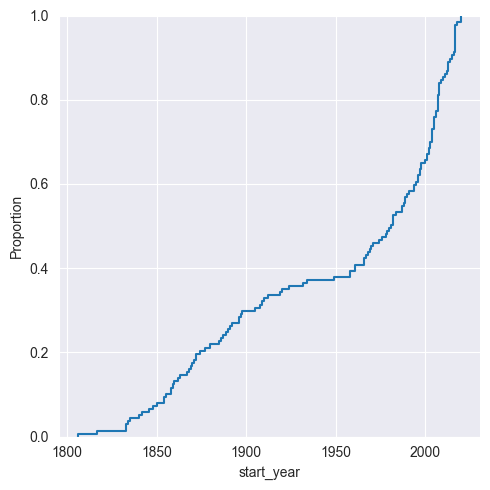

In [10]:
sns.displot(cities, x="start_year", kind="ecdf")
plt.show()

Um eine Übersicht der Werteverteilungen zu bekommen und Outlier festzustellen eignet sich auch sehr gut ein Boxplot. Hier werden für numerischen Spalten jeweils "Boxen" gezeichnet mit folgenden Eigenschaften:
- Die Box geht auf der Y-Achse vom unteren Quartil (Q1, 25% der Werte sind kleiner als dieser Wert) bis zum oberen Quartil (Q3, 25% der Werte sind größer als dieser Wert
- Eine horizontale Linie beim Median (50% der Werte sind kleiner/größer als dieser Wert)
- Striche (*whiskers*) markieren den "normalen" Bereich der Daten - diese können über Parameter verändert werden aber standarmäßig ist der Bereich zwischen 1.5 x (Q3-Q1) unterhalb Q1 / oberhalb Q3
- Punkte für alle Werte, die außerhalb der *whiskers* sind - sogenannte Outliers

Da unsere numerischen Werte unterschiedliche Wertebereiche haben, erzeugen wir die boxplots nebeneinander in subplots.

C:\Users\MoritzSchwarz\AppData\Local\Temp\ipykernel_24216\3993104191.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot(cities['start_year'], labels=['Jahr'])
C:\Users\MoritzSchwarz\AppData\Local\Temp\ipykernel_24216\3993104191.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot(cities['age'], labels=['Alter'])
C:\Users\MoritzSchwarz\AppData\Local\Temp\ipykernel_24216\3993104191.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot(cities['length_km'], labels=['Länge in km'])


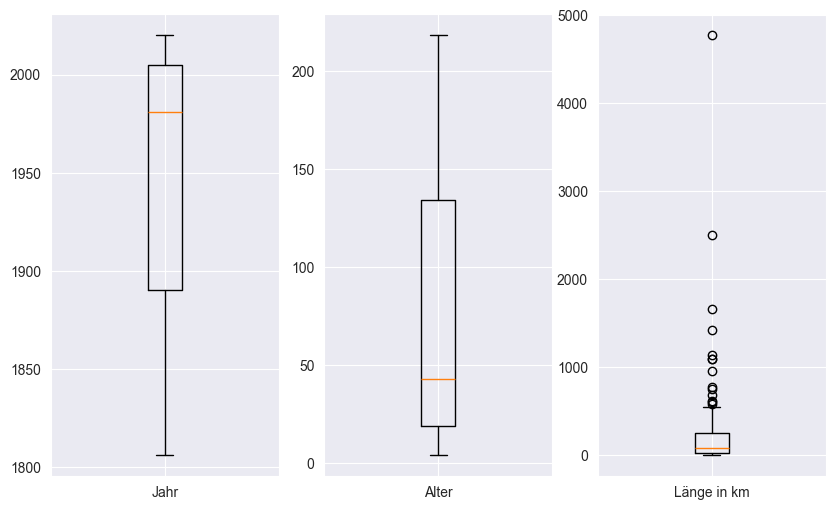

In [11]:
fig, ax = plt.subplots(ncols=3, figsize=(10,6))
ax[0].boxplot(cities['start_year'], labels=['Jahr'])
ax[1].boxplot(cities['age'], labels=['Alter'])
ax[2].boxplot(cities['length_km'], labels=['Länge in km'])
plt.show()



<div class="alert alert-warning">
<b>ÜBUNG:</b>Alter vs. Länge
    <ol><li>Erstellen Sie einen Scatter-Plot, der den Zusammenhäng zwischen Alter und Länge des Liniennetzes darstellt</li>
        <li>Gehen Sie durch die Doku von <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots">subplots</a> und erstellen eine 2 x 2 Matrix von Plots. Beachten Sie, dass der Rückgabewert der Funktion nun ein Array von axes ist. Zeichnen Sie in die linke untere Ecke den Scatter-Plot wie oben</li>
         <li>Fügen Sie nun über dem Scatter-Plot das Histogramm für den X-Achsen-Wert des Scatter-Plots und rechts daneben das Histogramm für den Y-Achsen-Wert. Nutzen Sie für das Histogramm rechts unten die vertikale Orientierung (siehe Doku)</li>
        <li>Bei der Länge gibt es einige Outlier, die das Chart zu sehr verdichten. Wählen Sie mit Hilfe des Boxplots oben eine geeignete Grenze aus und erstellen ein neues Datenset ohne Outlier. Zeichnen Sie erneut die Charts für das neue Datenset.</li>
        <li>Bonus: Berechnen Sie mit Hilfe von np.polyfit eine Lineare Regression zwischen Startjahr und Länge. Zeichnen Sie die entsprechende Linie in den Scatter-Plot</li>
</div>

In [ ]:
cities

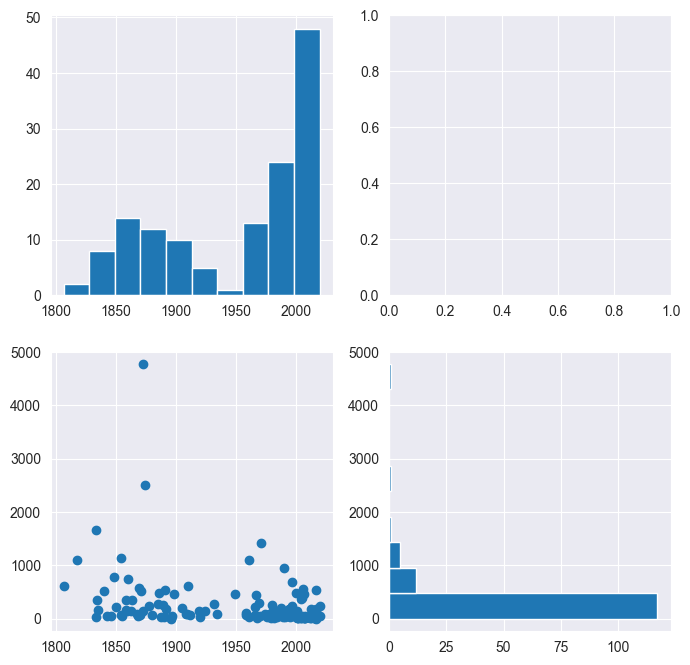

In [26]:
# 1.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
axs[0][0].hist(cities['start_year'])
axs[1, 0].scatter(cities['start_year'], cities['length_km'])
axs[1, 1].hist(cities['length_km'], orientation='horizontal')
plt.show()

In [ ]:
# 2. und 3.


573.8685


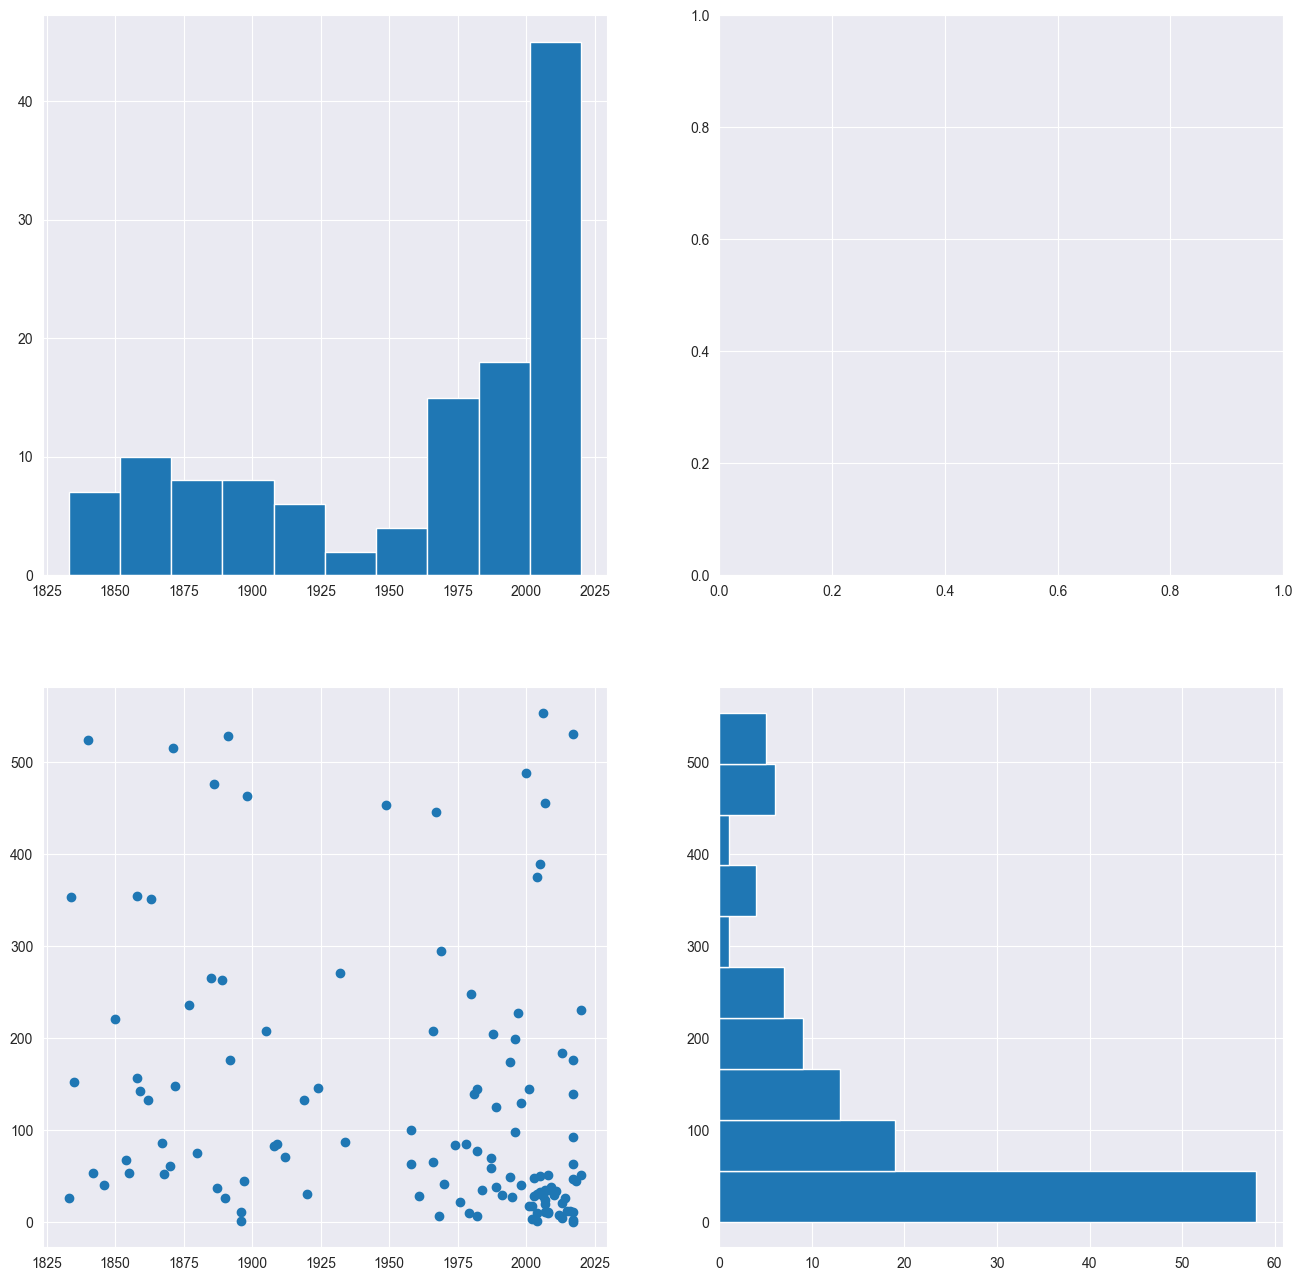

In [29]:
# 4.
Q1 = cities['length_km'].quantile(0.25)
Q2 = cities['length_km'].quantile(0.75)
upper_threshold = Q2 + 1.5 * (Q2-Q1)
print(upper_threshold)

cities_threshold = cities[cities['length_km'] <= 575]
fig, ax = plt.subplots(2, 2, figsize=(16, 16))
ax[0,0].hist(cities_threshold['start_year'])
ax[1,1].hist(cities_threshold['length_km'], orientation='horizontal')
ax[1,0].scatter(cities_threshold['start_year'], cities_threshold['length_km'])
plt.show()

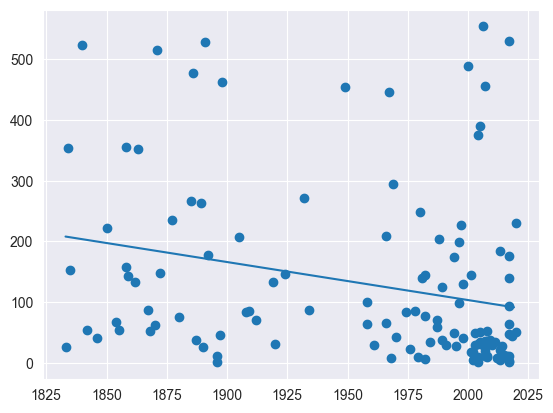

In [32]:
# 5.
coeffs = np.polyfit(cities_threshold['start_year'], cities_threshold['length_km'], deg=1)
years=np.arange(cities_threshold['start_year'].min(), cities_threshold['start_year'].max())
lengths=coeffs[1]+years*coeffs[0]
plt.plot(years, lengths)
plt.scatter(cities_threshold['start_year'], cities_threshold['length_km'])
plt.show()

## Daten zusammenfassen: Statistiken

pandas biete viele Funktionen um Daten zusammenzufassen. Die einfachste Möglichkeit ist statistische Merkmale über numerische Spalten zu berechnen, z.B.:

In [33]:
print(f'Anzahl der Städte: {cities["name"].count()}')
print(f'Durchschnittliches Alter der Netze: {cities["age"].mean():.1f} Jahre')
print(f'Alter der Netze:')
print(f'  Min:        {cities["age"].min():5.1f}')
print(f'  1. Quartil: {cities["age"].quantile(0.25):5.1f}')
print(f'  Median:     {cities["age"].quantile(0.5):5.1f}')
print(f'  3. Quartil: {cities["age"].quantile(0.75):5.1f}')
print(f'  Max:        {cities["age"].max():5.1f}')
print(f'Gesamtlänge der Netze: {cities["length_km"].sum():,.0f} km')

Anzahl der Städte: 137
Durchschnittliches Alter der Netze: 72.8 Jahre
Alter der Netze:
  Min:          4.0
  1. Quartil:  19.0
  Median:      43.0
  3. Quartil: 134.0
  Max:        218.0
Gesamtlänge der Netze: 34,577 km


Die entsprechenden Funktionen können auch auf das Gesamte DataFrame angewandt werden und werden dann für jede Spalte getrennt berechnet. Das Ergebnis ist eine Series mit den Spaltennamen als Index. Die Werte werden berechnet, wenn die Operation (z.B. `+` für `sum`) definiert ist, unabhängig davon, ob es inhaltlich sinnvoll ist, z.B.:

In [34]:
# Summe über alle Spalten
# Strings werden hintereinanders weggeschrieben 
# Die Summe der Startjahre sowie der Geo-Koordinaten hat keine verwertbare Bedeutung
cities.sum()

name          AthensBostonNew YorkHelsinkiSan FranciscoBerge...
country       GreeceUnited StatesUnited StatesFinlandUnited ...
lat                                                 4159.765017
long                                                -648.311406
start_year                                               267319
age                                                        9969
length_km                                             34576.771
dtype: object

In [ ]:
# Durchschnittswerte sind nur für numerische Typen definiert
# Spalten von anderen Typen müssen zuvor aussortiert werden,
# sonst erscheint eine Warnung
cities[['lat', 'long', 'start_year', 'age', 'length_km']].mean()

Weitere Funktionen finden Sie in der API Referenz: https://pandas.pydata.org/docs/reference/series.html#computations-descriptive-stats

Recht nützlich beim Kennenlernen eines Datensatzes ist die `describe`-Methode, die verschiedene deskriptive Statistiken erstellt:

In [35]:
cities.describe()

,lat,long,start_year,age,length_km
count,137.000000,137.000000,137.000000,137.000000,137.000000
mean,30.363248,-4.732200,1951.233577,72.766423,252.385190
std,26.016580,74.304119,63.454623,63.454623,521.966382
min,-38.957350,-123.100000,1806.000000,4.000000,0.639000
25%,27.950000,-73.583333,1890.000000,19.000000,31.236000
50%,40.450000,0.104970,1981.000000,43.000000,83.040000
75%,47.330404,16.333333,2005.000000,134.000000,248.289000
max,60.392500,151.200000,2020.000000,218.000000,4770.864000


## Daten zusammenfassen: Gruppierungen

Häufig sind Statistiken nicht nur gesamthaft für alle Daten interessant, sondern für Untergruppen. Hier kommt die `groupby`-Methode ins Spiel. Dabei werden ein oder mehrere Spalten angegeben, die die Gruppen bestimmen. Jede eindeutige Wertekombination dieser Spalten ergibt eine neue Gruppe. Für diese Gruppen kann dann mit der `agg`-Methode angeben werden für welche anderen Spalten welche Statistiken berechnet werden.

Beispiele:

In [38]:
# Gruppieren nach 1 Spalte (Land) und gleiche Aggregation für alle (numerischen) Spalten
# Direkte Verwendendung von Aggregations-Funktion (Summe) auf den Gruppen:
cities.groupby('country').sum().head()

,name,lat,long,start_year,age,length_km
country,,,,,,
Argentina,Buenos AiresCórdobaRosarioMendozaLa PlataNeuqu...,-237.415125,-438.761505,13605,563,1584.773
Australia,MelbourneSydney,-71.650000,296.166667,3712,336,423.081
Austria,ViennaGrazInnsbruck,142.566667,43.149999,5891,181,143.707
Belgium,Brussels,50.866667,4.366667,2017,7,530.739
Bolivia,La Paz,-16.450000,-68.366667,2011,13,33.640


In [39]:
# Gruppieren nach 1 Spalte (Land) aber verschiedene Aggregationen für verschiedene Spalten
# Funktionen werden über Dictionary den Spalten zugewiesen)
# Per Liste sind auch mehrere Funktionen pro Spalte möglich
cities.groupby('country').agg({'start_year': 'min', 'length_km': 'sum', 'name': 'count'}).head()

,start_year,length_km,name
country,,,
Argentina,1854,1584.773,7
Australia,1854,423.081,2
Austria,1896,143.707,3
Belgium,2017,530.739,1
Bolivia,2011,33.640,1


Statt einer Spalte, können auch mehrere in Form einer Liste angegeben werden.
Standardmäßig werden die Gruppen als Index des resultierenden Datensatzes gesetzt. Für die Weiterverarbeitung ist es oftmals praktischer die Gruppen als normale Spalten zu haben - dafür gibt es den Parameter `as_index=False`. 

## Daten sortieren

Beim Gruppieren werden die Gruppen standardmäßig sortiert. Dies ist auch nützlich um z.B. die größten oder ältesten Netze zu finden:

In [40]:
# Die 5 ältesten Netze anzeigen
# DataFrame wird standardmäßig nicht verändert!
cities.sort_values('start_year',ascending=True).head(5)

,name,country,lat,long,start_year,age,length_km
id,,,,,,,
139,Boston,United States,42.350000,-71.083333,1806,218,615.505
206,New York,United States,40.783333,-73.966667,1817,207,1089.854
69,London,England,51.533333,-0.083333,1833,191,1663.529
205,New Orleans,United States,29.950000,-90.066667,1833,191,26.625
212,Philadelphia,United States,39.950000,-75.166667,1834,190,354.183


In [41]:
# Das DataFrame dauerhaft nach Länge absteigend sortieren
cities.sort_values('length_km', ascending=False,inplace=True)
# Die ersten 5 Einträge anzeigen
cities.head(5)

,name,country,lat,long,start_year,age,length_km
id,,,,,,,
114,Tokyo,Japan,35.666667,139.750000,1872,152,4770.864
91,Osaka,Japan,34.693889,135.502222,1874,150,2503.834
69,London,England,51.533333,-0.083333,1833,191,1663.529
356,Seoul,South Korea,37.566536,126.977966,1971,53,1418.234
1,Buenos Aires,Argentina,-34.605050,-58.412200,1854,170,1141.979


Auch hier können wieder mehrere Spalten in Form einer Liste angegeben werden - ascending kann dann auch als Liste angegeben werden, wenn je Spalte eine unterschiedliche Reihenfolge gewünscht ist. Soll statt nach einer Spalte nach dem Index sortiert werden, muss die Methode `sort_index` verwendet werden.

Um die n größten Einträge anzuzeigen gibt es auch eine Hilfsmethode `nlargest`:

In [42]:
cities.nlargest(3, 'age')

,name,country,lat,long,start_year,age,length_km
id,,,,,,,
139,Boston,United States,42.350000,-71.083333,1806,218,615.505
206,New York,United States,40.783333,-73.966667,1817,207,1089.854
69,London,England,51.533333,-0.083333,1833,191,1663.529


Sollen das älteste Netz pro Land angezeigt werden, müssen wir verschiedene Techniken kombinieren:
- Der Datensatz wird sortiert nach Alter
- Es wird gruppiert nach Land
- Pro Gruppe wird mit head(1) der erste Eintrag angezeigt - da der Datensatz sortiert ist, ist es auch der älteste

In [43]:
cities.sort_values('age', ascending=False, inplace=True)
oldest_per_country = cities.groupby('country').head(1)
oldest_per_country.head(5)

,name,country,lat,long,start_year,age,length_km
id,,,,,,,
139,Boston,United States,42.350000,-71.083333,1806,218,615.505
69,London,England,51.533333,-0.083333,1833,191,1663.529
79,Milan,Italy,45.450000,9.166667,1840,184,523.871
45,Edinburgh,Scotland,55.916667,-3.166667,1846,178,40.394
14,Barcelona,Spain,41.383333,2.150000,1848,176,775.034


In [44]:
# Beachten Sie, dass eine max-Aggregation ein anderes Ergebnis liefert
# Hier werden alle Spalten unabhängig voneinander maximiert
# D.h. es wird zwar das maximale Alter ausgegeben, doch gehört
# dies nicht zwangsläufig zur genannten Stadt/Koordinate/Länge
cities.groupby('country',as_index=False, sort=False).max().head(5)

,country,name,lat,long,start_year,age,length_km
0,United States,Washington,47.616667,-71.083333,2017,218,1089.854
1,England,Newcastle-on-Tyne,54.966667,-0.083333,2017,191,1663.529
2,Italy,Venice,45.450000,14.250000,1982,184,523.871
3,Scotland,Glasgow,55.916667,-3.166667,1891,178,528.652
4,Spain,Zaragoza,43.320000,2.150000,2008,176,775.034


<div class="alert alert-warning">
<b>ÜBUNG: </b> Bar Charts
<p>Bar Charts sind nützlich, um Werte für verschiedene Kategorien zu vergleiche, z.B. das Alter des Liniennetzes (Werte) für verschiedene Städte (Kategorien). Die Kategorien stehen in keinem direkten Zusammenhang und daher eignen sich unabhängige Balken (*bars*) mehr als eine durchgehende Linie, die man z.B. bei einem zeitlichen oder räumlichen Verlauf gut nutzen kann. Nutzen Sie das <a href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py">Galerie-Beispiel</a> und die <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.barh.html#matplotlib.axes.Axes.barh">Matplotlib-Doku</a> für die folgende Aufgabe:</p>
    <p>Erstellen Sie nebeneinander zwei horizontale Bar-Charts, die die 10 Länder mit den ältesten Liniennetzen darstellen. Im linken Chart soll die Länge des ältesten Netzes des Landes dargstellt werden. Im rechten Chart das Alter. Fügen Sie Beschriftungen zu den *bars* hinzu, die den genauen Wert (Länge/Alter) anzeigen. Nutzen Sie hierfür die Matplotlab-Galerie, um eine passende Vorlage zu finden.</p>
</div>

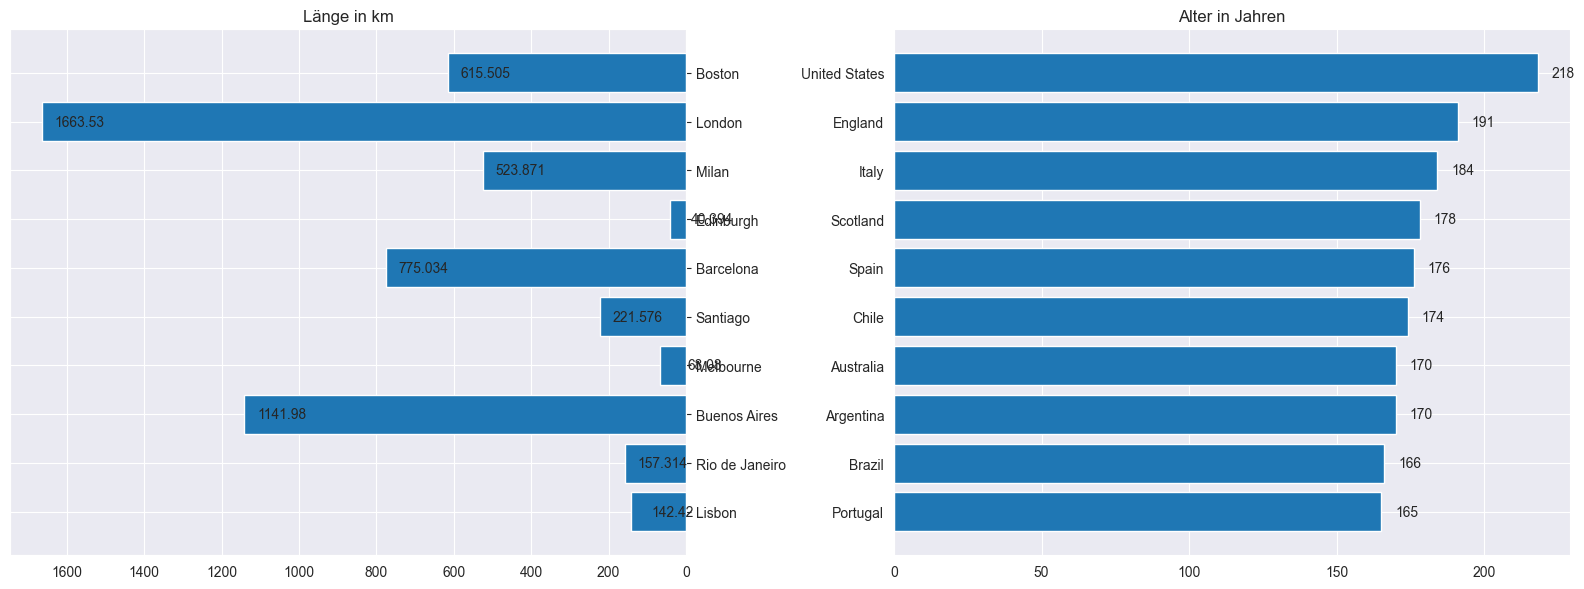

In [50]:
fig, ax = plt.subplots(ncols=2, figsize=(16,6))

# Für linkes Chart löschen wir die Beschriftung an der linken Seite
# und erstellen stattdessen eine Axe auf der rechten Seite
ax[0].set_yticklabels([])
ax[0].set_yticks([])
ax_right = ax[0].twinx()
# Im linken Chart sollen die Werte von rechts nach links wachsen
ax_right.invert_xaxis()
# In beiden Charts sollen die ältesten oben stehen
ax_right.invert_yaxis()
ax_right.set_title('Länge in km')
length_bars = ax_right.barh(oldest_per_country['name'].head(10),width=oldest_per_country['length_km'].head(10))
ax_right.bar_label(length_bars, padding=-45)

age_bars = ax[1].barh(oldest_per_country['country'].head(10), width=oldest_per_country['age'].head(10))
ax[1].bar_label(age_bars, padding=10)
# In beiden Charts sollen die ältesten oben stehen
ax[1].invert_yaxis()
ax[1].set_title('Alter in Jahren')
# Sets space between subplots such that labels do not overlap
fig.tight_layout()
plt.show()